In [ ]:
from scipy.io import loadmat
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time
from sklearn.preprocessing import LabelEncoder

In [ ]:
def load_data_from_mat(file_path, key):
    from scipy.io import loadmat
    data = loadmat(file_path)
    return data[key]

In [ ]:
def prepare_data_for_classification(classes):
    X, y = [], []
    for label, class_id in enumerate(classes):
        file_info = file_info_dict[class_id]  # Get file paths and keys for each class
        for file_path, key in file_info:
            data = load_data_from_mat(file_path, key)
            X.append(data)
            y.append(np.array([label] * data.shape[0]))  # Assign the same label to all samples
    X = np.concatenate(X)
    y = np.concatenate(y)
    return X, y

In [ ]:
# Define paths and keys for each class
file_info_dict = {
    'A': [('/content/drive/MyDrive/emdvmd/EMDF.mat', 'IMFemd1F')],
    'B': [('/content/drive/MyDrive/emdvmd/EMDN.mat', 'IMFemd1N')],
    'C': [('/content/drive/MyDrive/emdvmd/EMDO.mat', 'IMFemd1O')],
    'D': [('/content/drive/MyDrive/emdvmd/EMDS.mat', 'IMFemd1S')],
    'E': [('/content/drive/MyDrive/emdvmd/EMDZ.mat', 'IMFemd1Z')]
}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def create_ann_model(input_shape, hidden_units):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=input_shape, activation='relu'))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def train_and_evaluate_ann_model(X_train, y_train, X_test, y_test, hidden_units, batch_size, epochs):
    model = create_ann_model(X_train.shape[1], hidden_units)

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

   # Display the model architecture
    model.summary()

    # Track the start time
    start_time = time.time()

    # Train the model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size,
                        verbose=1, callbacks=[early_stopping])

    # Track the end time and compute total time
    end_time = time.time()
    total_time = end_time - start_time

    # Evaluate the model
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    score = model.evaluate(X_test, y_test, verbose=1)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred)

    print(f'Test loss: {score[0]}')
    print(f'Test accuracy: {accuracy}')
    print(f'Sensitivity (Recall): {sensitivity}')
    print(f'Specificity: {specificity}')
    print(f'F1 Score: {f1}')
    print(f'Total training time: {total_time:.2f} seconds')  # Display total computational time

    # Confusion matrix as heatmap
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Plot accuracy and loss over epochs
    plt.figure(figsize=(12, 5))

    # Accuracy evolution
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss evolution
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [ ]:
def run_classification(classes_1, classes_2, title):
    print(f"Running classification for {title}")
    X_1, y_1 = prepare_data_for_classification(classes_1)
    X_2, y_2 = prepare_data_for_classification(classes_2)

    X = np.concatenate([X_1, X_2])
    y = np.concatenate([np.zeros(len(y_1)), np.ones(len(y_2))])  # 0 for classes_1, 1 for classes_2

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    y = y.astype(int)  # Ensure labels are integers
    y = np.eye(len(np.unique(y)))[y]  # One-hot encode the labels

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_and_evaluate_ann_model(X_train, y_train, X_test, y_test, hidden_units=64, batch_size=32, epochs=20)

#AB-CDE

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,689 (41.75 KB)

 Trainable params: 10,689 (41.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7460 - loss: 0.4480 - val_accuracy: 0.9478 - val_loss: 0.1408
Epoch 2/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9650 - loss: 0.1027 - val_accuracy: 0.9735 - val_loss: 0.0705
Epoch 3/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9872 - loss: 0.0400 - val_accuracy: 0.9817 - val_loss: 0.0487
Epoch 4/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9969 - loss: 0.0150 - val_accuracy: 0.9884 - val_loss: 0.0318
Epoch 5/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 0.0057 - val_accuracy: 0.9866 - val_loss: 0.0348
Epoch 6/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9908 - val_loss: 0.0271
Epoch 7/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9908 - val_loss: 0.0238
Epoch 8/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.3932e-04 - val_accuracy

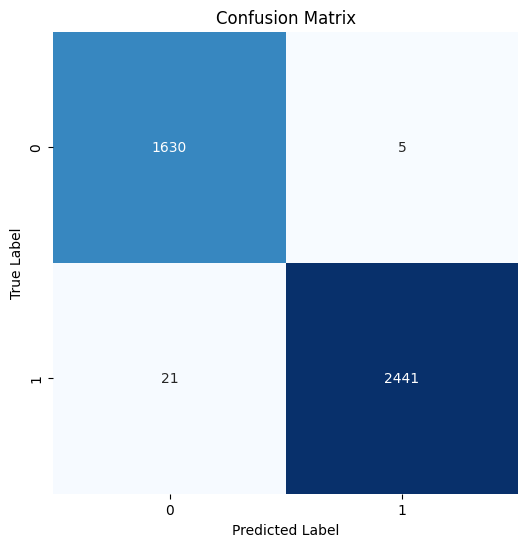

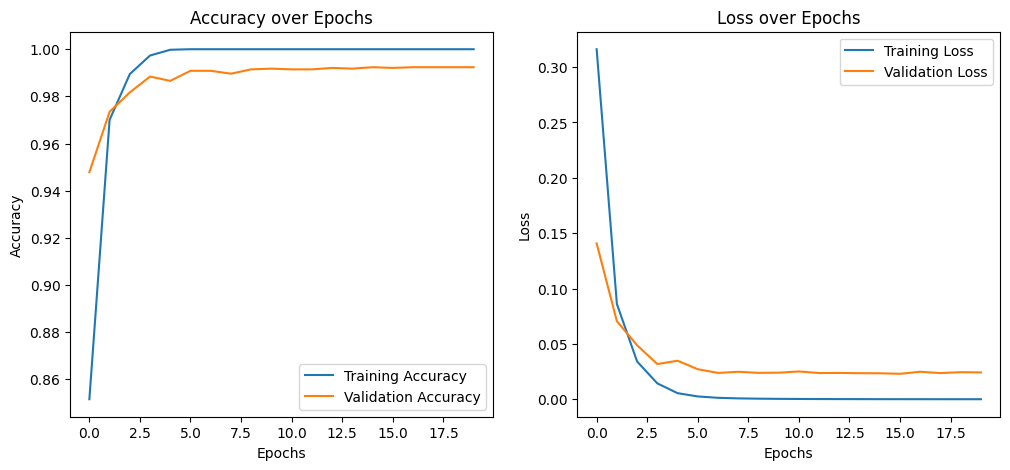

In [ ]:
# Load and preprocess data for classes A-B vs. C-D-E
classes_ab = ['A', 'B']
classes_cde = ['C', 'D', 'E']
X_ab, y_ab = prepare_data_for_classification(classes_ab)
X_cde, y_cde = prepare_data_for_classification(classes_cde)

# Merge and create new labels
X = np.concatenate([X_ab, X_cde])
y = np.concatenate([np.zeros(len(y_ab)), np.ones(len(y_cde))])  # 0 for A-B, 1 for C-D-E

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the ANN model
train_and_evaluate_ann_model(X_train, y_train, X_test, y_test, hidden_units=64, batch_size=32, epochs=20)

Classification A-E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,689 (41.75 KB)

 Trainable params: 10,689 (41.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6542 - loss: 0.6132 - val_accuracy: 0.9176 - val_loss: 0.2905
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9565 - loss: 0.1896 - val_accuracy: 0.9809 - val_loss: 0.0770
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9966 - loss: 0.0367 - val_accuracy: 0.9870 - val_loss: 0.0457
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9988 - loss: 0.0129 - val_accuracy: 0.9924 - val_loss: 0.0306
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.9931 - val_loss: 0.0252
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9916 - val_loss: 0.0228
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9924 - val_loss: 0.0223
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.

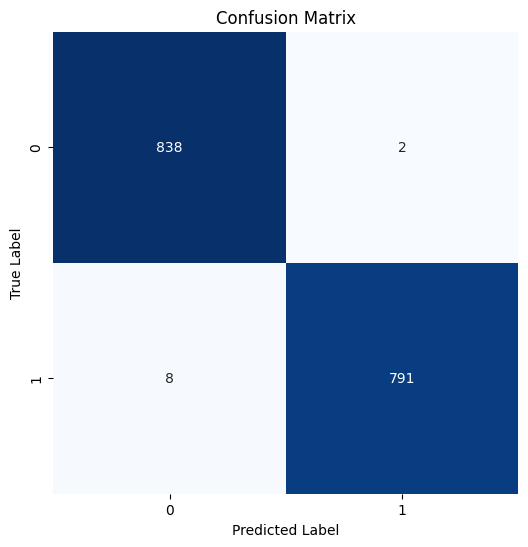

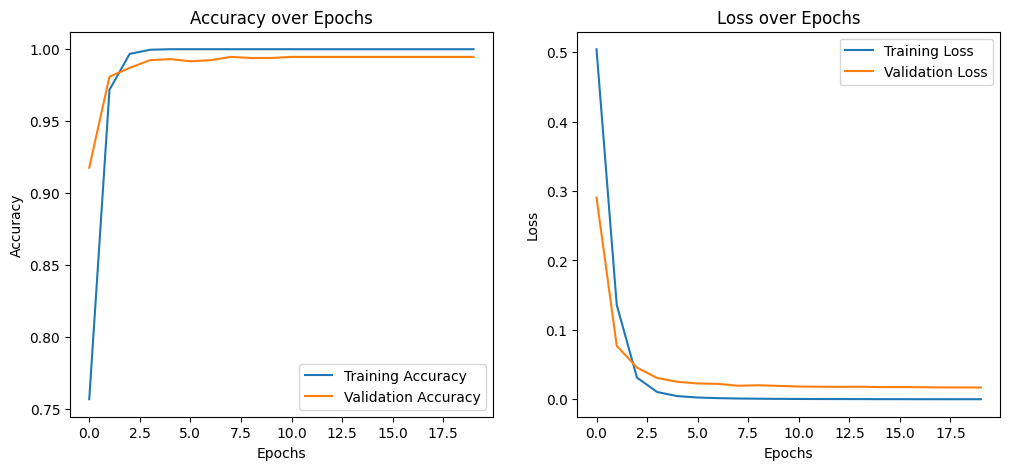

In [ ]:
# Load and preprocess data for classes A and E
classes_a = ['A']
classes_e = ['E']
X_a, y_a = prepare_data_for_classification(classes_a)
X_e, y_e = prepare_data_for_classification(classes_e)

# Merge and create new labels
X = np.concatenate([X_a, X_e])
y = np.concatenate([np.zeros(len(y_a)), np.ones(len(y_e))])  # 0 for A, 1 for E

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Ensure labels are integers
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the ANN model
train_and_evaluate_ann_model(X_train, y_train, X_test, y_test, hidden_units=64, batch_size=32, epochs=20)

Classification B-E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,689 (41.75 KB)

 Trainable params: 10,689 (41.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6270 - loss: 0.6009 - val_accuracy: 0.9405 - val_loss: 0.2734
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9755 - loss: 0.1628 - val_accuracy: 0.9916 - val_loss: 0.0584
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9988 - loss: 0.0273 - val_accuracy: 0.9962 - val_loss: 0.0299
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 0.9977 - val_loss: 0.0204
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9969 - val_loss: 0.0187
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9969 - val_loss: 0.0174
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9969 - val_loss: 0.0162
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 9.0402e-04 - val_accuracy

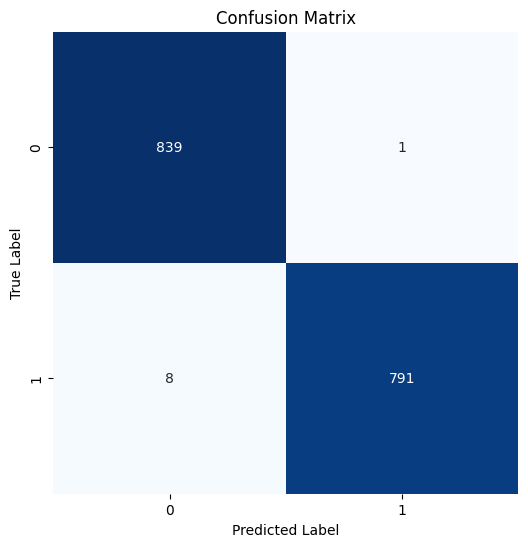

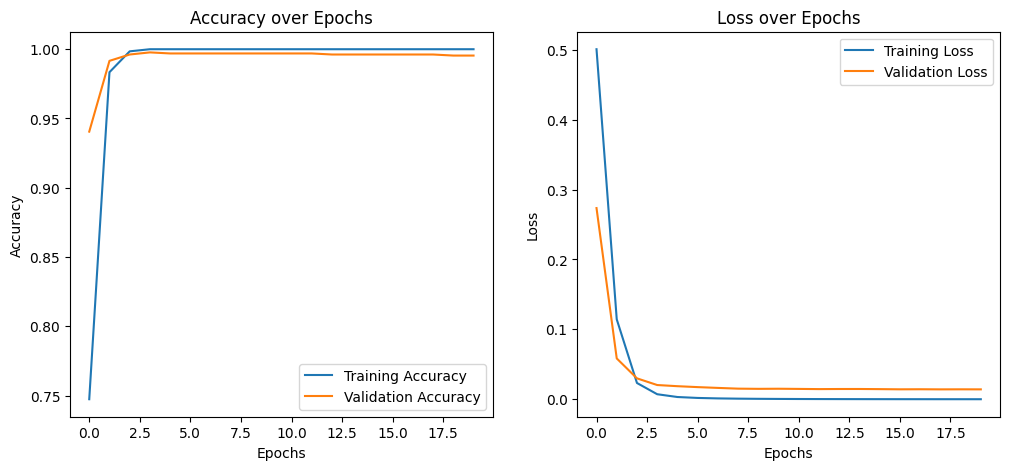

In [ ]:
# Load and preprocess data for classes B and E
classes_b = ['B']
classes_e = ['E']
X_b, y_b = prepare_data_for_classification(classes_b)
X_e, y_e = prepare_data_for_classification(classes_e)

# Merge and create new labels
X = np.concatenate([X_b, X_e])
y = np.concatenate([np.zeros(len(y_b)), np.ones(len(y_e))])  # 0 for B, 1 for E

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Ensure labels are integers
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the ANN model
train_and_evaluate_ann_model(X_train, y_train, X_test, y_test, hidden_units=64, batch_size=32, epochs=20)


Classification B-D

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,689 (41.75 KB)

 Trainable params: 10,689 (41.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7635 - loss: 0.3566 - val_accuracy: 0.9954 - val_loss: 0.0403
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9991 - loss: 0.0113 - val_accuracy: 0.9992 - val_loss: 0.0042
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9985 - val_loss: 0.0043
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 8.3669e-04 - val_accuracy: 0.9977 - val_loss: 0.0084
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.3072e-04 - val_accuracy: 0.9977 - val_loss: 0.0096
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.6873e-04 - val_accuracy: 0.9977 - val_loss: 0.0108
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.0542e-04 - val_accuracy: 0.9977 - val_loss: 0.0119
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

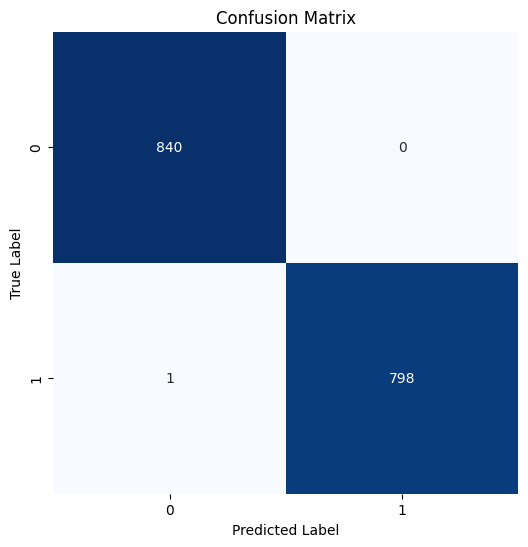

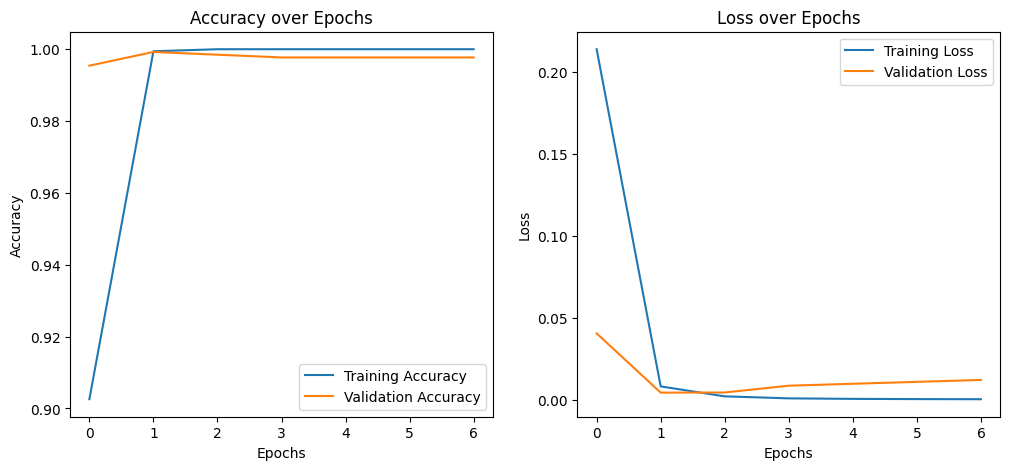

In [ ]:
# Load and preprocess data for classes B and D
classes_b = ['B']
classes_d = ['D']
X_b, y_b = prepare_data_for_classification(classes_b)
X_d, y_d = prepare_data_for_classification(classes_d)

# Merge and create new labels
X = np.concatenate([X_b, X_d])
y = np.concatenate([np.zeros(len(y_b)), np.ones(len(y_d))])  # 0 for B, 1 for D

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Ensure labels are integers
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the ANN model
train_and_evaluate_ann_model(X_train, y_train, X_test, y_test, hidden_units=64, batch_size=32, epochs=20)


Classification A-C

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,689 (41.75 KB)

 Trainable params: 10,689 (41.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6311 - loss: 0.5923 - val_accuracy: 0.9764 - val_loss: 0.1934
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9939 - loss: 0.1104 - val_accuracy: 0.9969 - val_loss: 0.0280
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0122 - val_accuracy: 0.9969 - val_loss: 0.0129
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9977 - val_loss: 0.0089
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9985 - val_loss: 0.0074
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9985 - val_loss: 0.0063
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.7337e-04 - val_accuracy: 0.9985 - val_loss: 0.0054
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 5.1323e-04 - val_accu

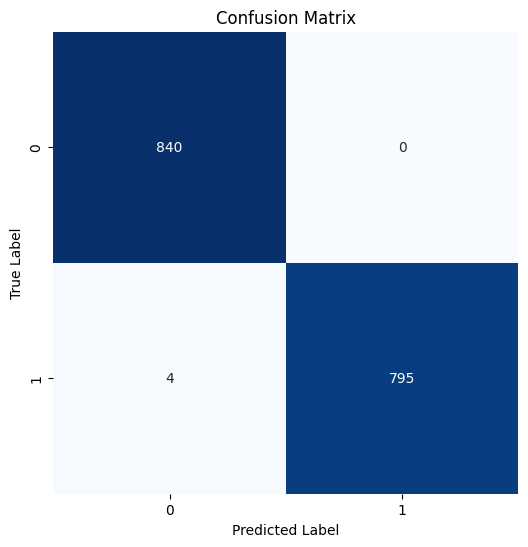

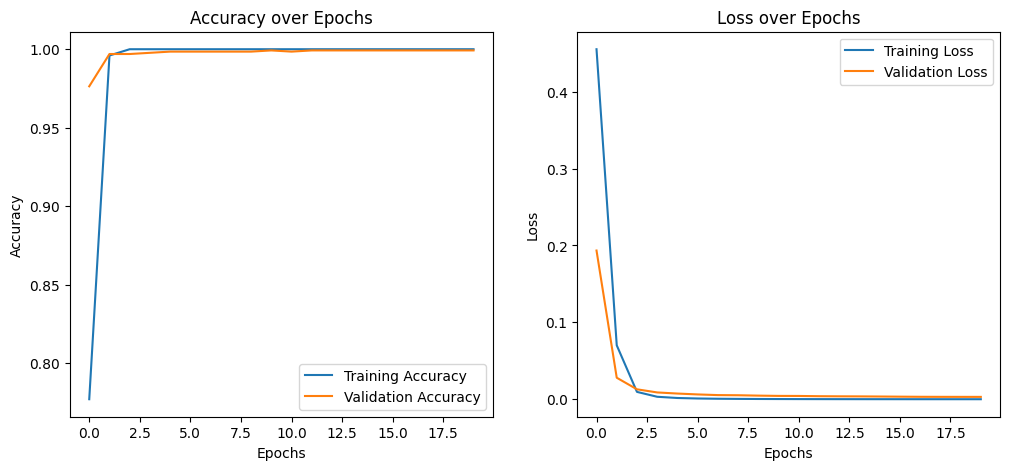

In [ ]:
# Load and preprocess data for classes A and C
classes_a = ['A']
classes_c = ['C']
X_a, y_a = prepare_data_for_classification(classes_a)
X_c, y_c = prepare_data_for_classification(classes_c)

# Merge and create new labels
X = np.concatenate([X_a, X_c])
y = np.concatenate([np.zeros(len(y_a)), np.ones(len(y_c))])  # 0 for A, 1 for C

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Ensure labels are integers
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the ANN model
train_and_evaluate_ann_model(X_train, y_train, X_test, y_test, hidden_units=64, batch_size=32, epochs=20)


Classification C-E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,689 (41.75 KB)

 Trainable params: 10,689 (41.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5897 - loss: 0.6072 - val_accuracy: 0.9275 - val_loss: 0.3249
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9679 - loss: 0.1959 - val_accuracy: 0.9977 - val_loss: 0.0533
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9977 - loss: 0.0289 - val_accuracy: 0.9985 - val_loss: 0.0179
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 5/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 6/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 7/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 8/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 8.5044e-04 - val_accuracy

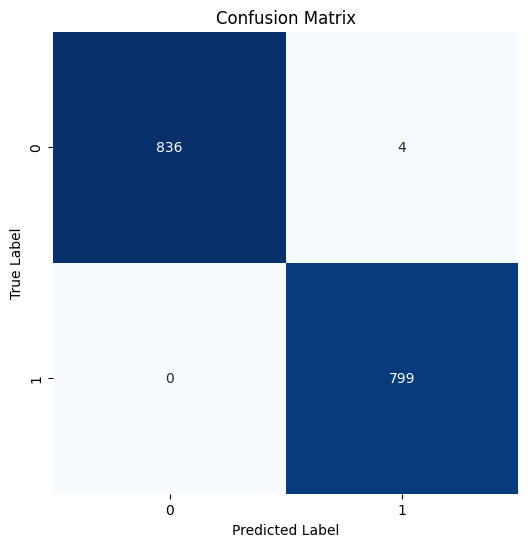

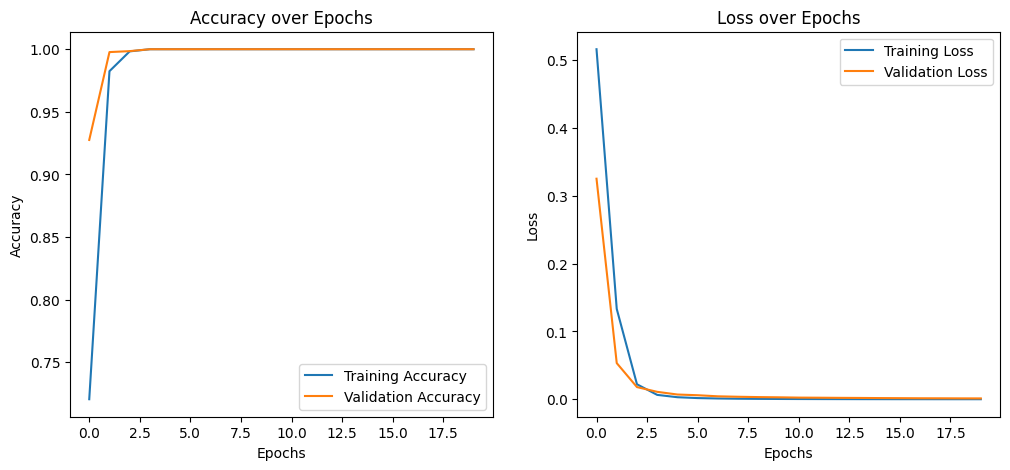

In [ ]:
# Load and preprocess data for classes C and E
classes_c = ['C']
classes_e = ['E']
X_c, y_c = prepare_data_for_classification(classes_c)
X_e, y_e = prepare_data_for_classification(classes_e)

# Merge and create new labels
X = np.concatenate([X_c, X_e])
y = np.concatenate([np.zeros(len(y_c)), np.ones(len(y_e))])  # 0 for C, 1 for E

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Ensure labels are integers
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the ANN model
train_and_evaluate_ann_model(X_train, y_train, X_test, y_test, hidden_units=64, batch_size=32, epochs=20)
